
## Data Description

The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Import Dataset

In [3]:
p = "C:/Users/julia/Downloads/ExtraaLearn.csv"
leads = pd.read_csv(p)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

## Data Overview

- Observations
- Sanity checks

## Insights: There are 15 columns and 4612 rows. There are 9 object variables: ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral. There are 5 numerical variables: age, website_visits, time_spent_on_website, page_view_per-visit, status.

In [5]:
# Check whether there are missing data
leads.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

## There are no missing data

## Exploratory Data Analysis (EDA)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [6]:
# check how many different leads in the data
len(leads.ID.value_counts())

4612

In [7]:
# There are no missing data, so it does not need to cope with missing data

# check wether there are some duplicate data
leads[leads.duplicated()]

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status


## There are no duplicate data, and there are 4612 different leads in the dataset

In [11]:
# remove leads ID from the data, because leads ID does not have influence in conversion rate
leads1 = leads.copy()
leads1 = leads1.drop(columns='ID')
# add another features to show wether leads heard or seen any form of ads, digital_mediam, educational_channel or referral

condition1 = leads1['print_media_type1'] == 'Yes'
condition2 = leads1['print_media_type2'] == 'Yes'
condition3 = leads1['digital_media'] == 'Yes'
condition4 = leads1['educational_channels'] == 'Yes'
condition5 = leads1['referral'] == 'Yes'
#set condition which means leads heard any form of ads
condition = condition1 | condition2 | condition3 | condition4 | condition5
leads1['heard_ads'] = 'No'
leads1.loc[condition, 'heard_ads'] = 'Yes'

In [10]:
leads1['heard_ads'].value_counts(normalize= True)

heard_ads
No     0.625108
Yes    0.374892
Name: proportion, dtype: float64

## About 37% of leads heard at least one form of ads

## EDA

- It is a good idea to explore the data once again after manipulating it.

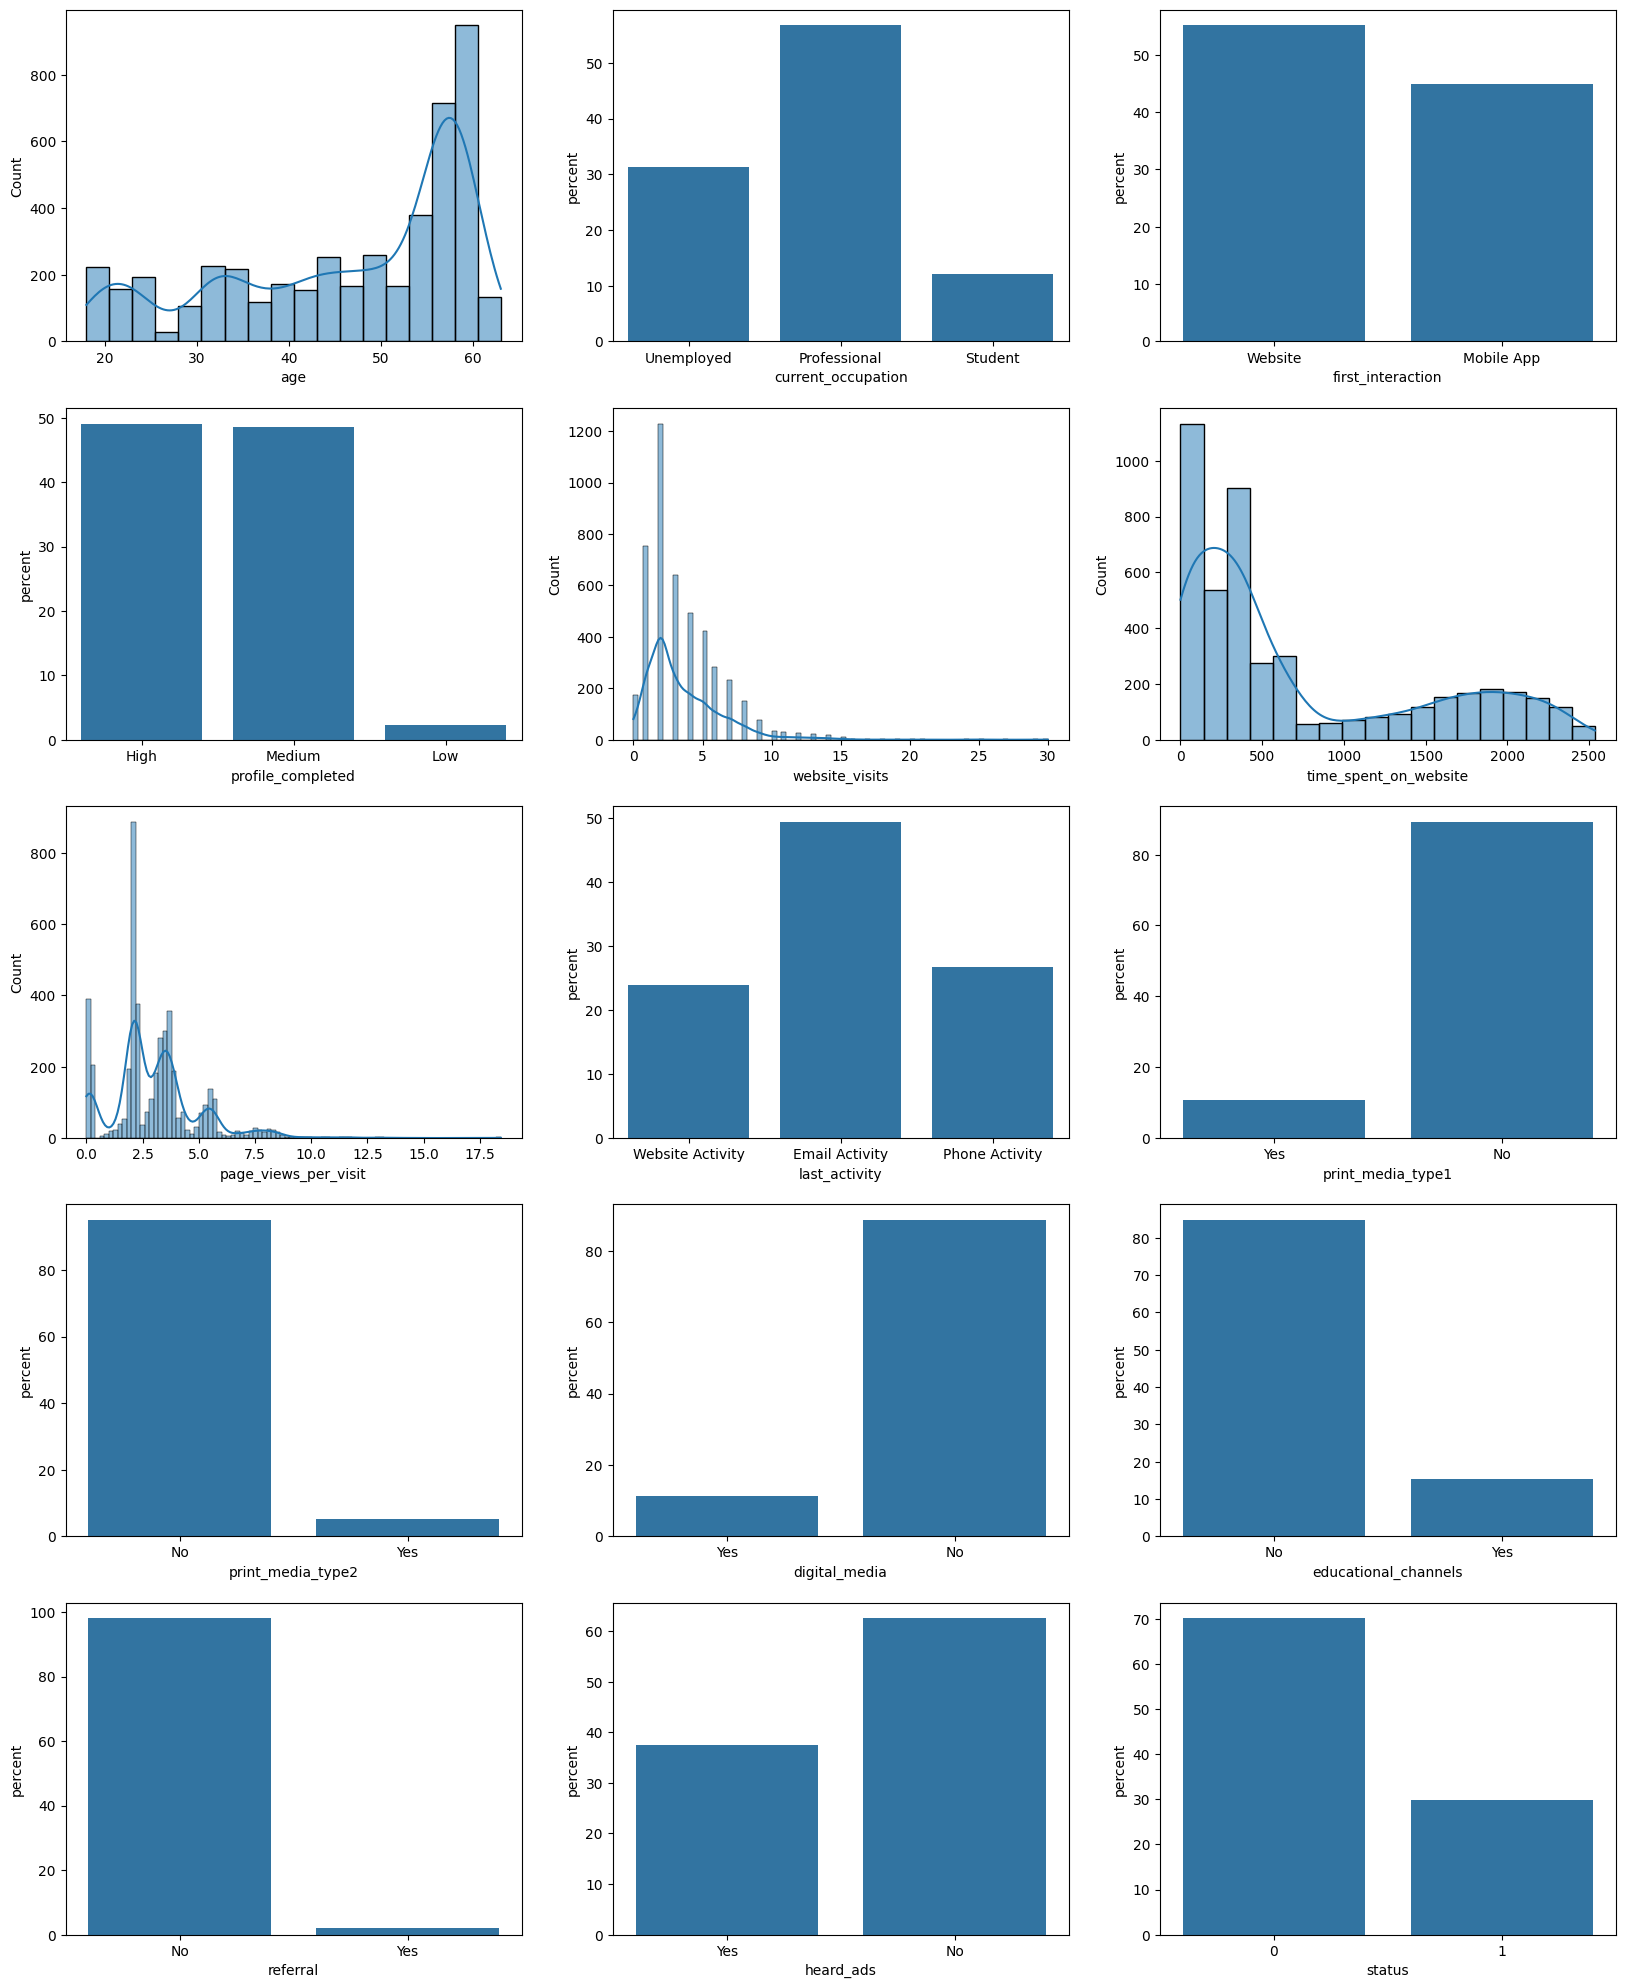

In [12]:
# Frist Check each independent variables distribution and dependent variables distribution

# depart target variable from all variables
cond = leads1.columns == 'status'
features = leads1.columns[~cond]

#plot the histplot or countplot for all variables
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20,25))
axes = np.ravel(axes)
for i,j in enumerate(features):
  if leads1.loc[:,j].dtypes== 'object':
    sns.countplot(data = leads1, x = j, ax = axes[i],stat = 'percent')
  else:
    sns.histplot(data = leads1, x = j, ax = axes[i], kde = True)
sns.countplot(data = leads1, x = 'status', ax= axes[14], stat = 'percent')
plt.show()

1.   In the dataset, more than 50% of leads are professional, and aound 10% are students;
2. less than 5% of leads filled very few profile(low), and about half of the  remaining leads filled high profile, and the other half filled medium profile;

3.  the data of website_visit is right skewed, and seems have many outliers.
4.  Time_spend_on_website also right skewed.
5. page__views_per_visit seems have outliers
6. The largest percentage of last_activity is by email.
7. About 37% of leads heard at least one form of ads(newspapers, magnizes, platforms,channels, referral)
8.About 30% of leads converted to customers who like to pay for online course, and the others did not.

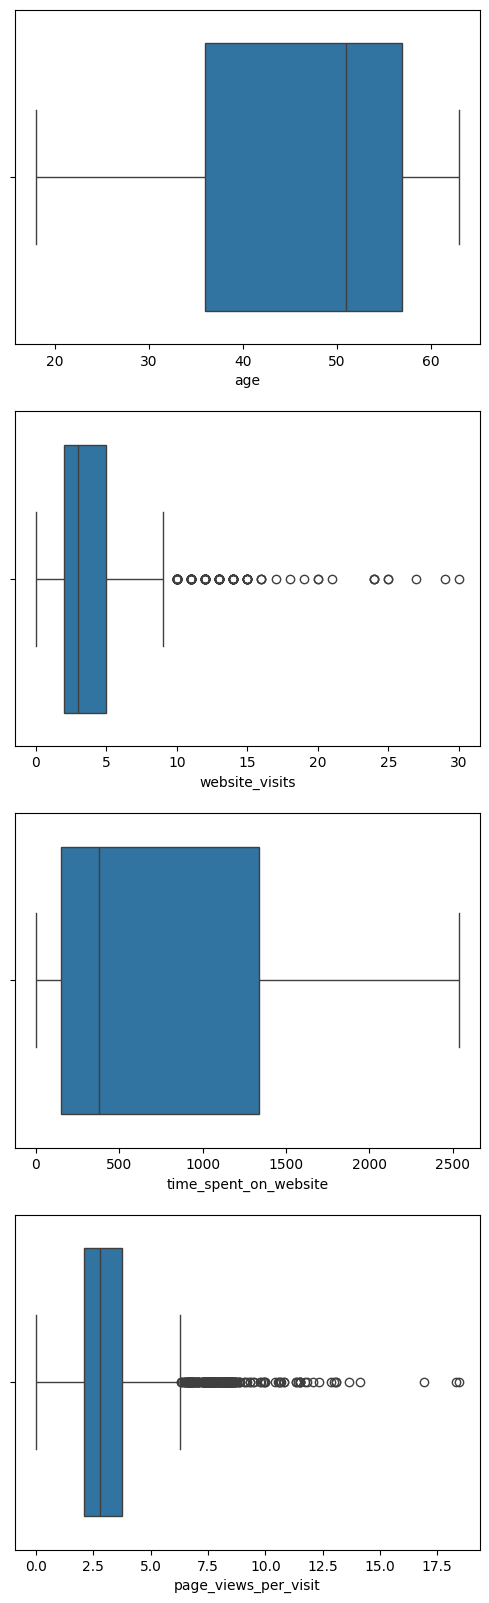

In [13]:
# plot the boxplot of numerical independent variables
num_features = leads1[features].select_dtypes(exclude= 'object').columns
fig, axes = plt.subplots(4,1, figsize = (6, 20))
axes = np.ravel(axes)
for i,j in enumerate(num_features):
  sns.boxplot(data = leads1, x = j, ax = axes[i])
plt.show()

In [14]:
# check the statistic of independent numerical variables
leads1[features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


In [15]:
# calculate the boundary of outlier for every independent numerical variables

# find the Q1 and O3 for independent numerical variables
Q1 = leads1[num_features].quantile(q = 0.25).round(2)
Q3 = leads1[num_features].quantile(q = 0.75).round(2)

# find the max and min for independent numerical variables
num_features_max = leads1[num_features].max()
num_features_min = leads1[num_features].min()

#find the outlier boundary
low_fence = Q1 - (Q3- Q1) * 1.5
upper_fence = Q3 + (Q3 - Q1) * 1.5
for i in num_features:
  if upper_fence[i] > num_features_max[i]:
    upper_fence[i] = num_features_max[i]
  if low_fence[i] < num_features_min[i]:
    low_fence[i] = num_features_min[i]
# dataframe for outlier
outlier_boundary = pd.concat((low_fence, upper_fence), axis = 1)
outlier_boundary.columns = ('low_boundary', 'upper_boundary')
outlier_boundary

,low_boundary,upper_boundary
age,18.0,63.00
website_visits,0.0,9.50
time_spent_on_website,0.0,2537.00
page_views_per_visit,0.0,6.28


## website_visits and page_views_per_visit have outliers, any website_visits largger than 9.5 are outliers, and any page_views_per_visit laggger than 6.28 are outliers.

In [16]:
# self definition function which plot different status in the independent variable
def plot_countplot_dataframe(data, variable):
  #plot barplot of vaiable vs status
  sns.countplot(data = data, x = variable, hue = 'status')
  plt.title(f'countplot of status in {variable}')
  plt.show()
  # Plot the percentage of paid leads in variable
  pd.crosstab(index = data[variable], columns= data['status'],values = data['age'], aggfunc = 'count', normalize= 'index').plot(kind = 'bar',stacked = True)
  plt.title(f'conversion rate of status in different {variable}')
  plt.show()
  # check the pivot_table of variable & 'status'
  variable_status = pd.pivot_table(data = data, index = [variable],columns= ['status'],values= 'age', aggfunc= 'count')

  # add columns which show the ration of convert to paid customers in each category of variable
  variable_status['paid percentage %'] = (variable_status.loc[:,1]/(variable_status.sum(axis= 1))).round(2)*100
  return(variable_status)